In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")

data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)


data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n] / 255.

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n] / 255.

In [3]:
def init_param():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

def ReLu(z):
    return np.maximum(0, z)   

def deriv_ReLu(z):
    return z > 0 #true = 1 and false = 0
                 #if z is greater than 0, it returns 1, which is in fact the derivative of ReLU when z is greater than 0!!!!

def softmax(z):
    z = z - np.max(z, axis=0, keepdims=True)
    expz = np.exp(z)
    return expz / np.sum(expz, axis=0, keepdims=True)
    
def forward_prop(w1, b1, w2, b2, x):
    z1 = np.dot(w1, x) + b1
    a1 = ReLu(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def one_hot(y, num_classes=10):
    one_hot_y = np.zeros((num_classes, y.size))
    one_hot_y[y, np.arange(y.size)] = 1
    return one_hot_y

    
def back_prop(z1, a1, z2, a2, w2, x, y):
    m = y.size
    one_hot_y = one_hot(y)
    
    dz2 = a2 - one_hot_y
    dw2 = (1 / m) * dz2.dot(a1.T)
    db2 = (1 / m) * np.sum(dz2, axis = 1, keepdims = True)

    dz1 = w2.T.dot(dz2) * deriv_ReLu(z1)
    dw1 = (1 / m) * dz1.dot(x.T)
    db1 = (1 / m) * np.sum(dz1, axis = 1, keepdims = True)

    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, L):
    w1 = w1 - L * dw1
    b1 = b1 - L * db1

    w2 = w2 - L * dw2
    b2 = b2 - L * db2

    return w1, b1, w2, b2

def get_prediction(a2):
    return np.argmax(a2, 0)

def accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

def grad_descent(x, y, I, L):
    w1, b1, w2, b2 = init_param()
    for i in range(I):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, x, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, L)
        if (i % 10 == 0):
            print("iterations: ", i)
            print("accuracy: ", accuracy(get_prediction(a2), y))
    return w1, b1, w2, b2

In [4]:
w1, b1, w2, b2 = grad_descent(x_train, y_train, 500, 0.1)

iterations:  0
[4 4 4 ... 0 4 7] [1 2 3 ... 9 6 7]
accuracy:  0.1043728813559322
iterations:  10
[4 7 0 ... 0 9 7] [1 2 3 ... 9 6 7]
accuracy:  0.1791864406779661
iterations:  20
[4 7 0 ... 0 4 7] [1 2 3 ... 9 6 7]
accuracy:  0.2659830508474576
iterations:  30
[1 7 0 ... 0 4 7] [1 2 3 ... 9 6 7]
accuracy:  0.3263898305084746
iterations:  40
[1 7 3 ... 0 6 7] [1 2 3 ... 9 6 7]
accuracy:  0.3923728813559322
iterations:  50
[1 7 3 ... 2 6 7] [1 2 3 ... 9 6 7]
accuracy:  0.44896610169491524
iterations:  60
[1 7 3 ... 2 6 7] [1 2 3 ... 9 6 7]
accuracy:  0.4896779661016949
iterations:  70
[1 7 3 ... 2 6 7] [1 2 3 ... 9 6 7]
accuracy:  0.5288813559322034
iterations:  80
[1 7 3 ... 2 6 7] [1 2 3 ... 9 6 7]
accuracy:  0.5615254237288135
iterations:  90
[1 7 3 ... 2 6 7] [1 2 3 ... 9 6 7]
accuracy:  0.5910847457627119
iterations:  100
[1 2 3 ... 9 6 7] [1 2 3 ... 9 6 7]
accuracy:  0.6166610169491525
iterations:  110
[1 2 3 ... 9 6 7] [1 2 3 ... 9 6 7]
accuracy:  0.6404915254237288
iterations:  1

In [5]:
def make_predictions(x, w1, b1, w2, b2):
    z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
    predictions = get_prediction(a2)
    return predictions

def test_predictions(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 258
    plt.gray()
    plt.imshow(current_image, interpolation = "nearest")
    plt.show()
    

Prediction:  [8]
Label:  8


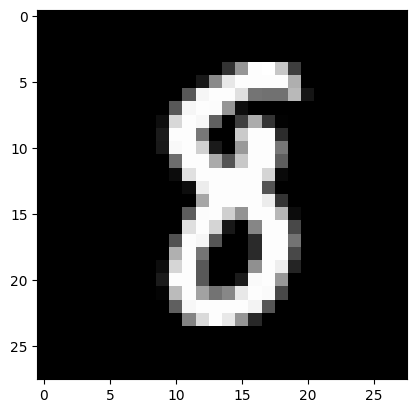

In [6]:
test_predictions(7777, w1, b1, w2, b2)